In [1]:
# Import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA

### Read the image file and visualize it.

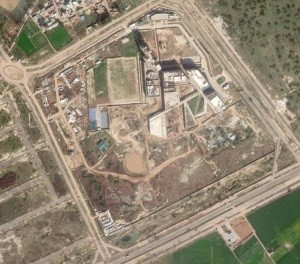

In [2]:
# Load the input image
image = cv2.imread('sat_image_plaksha.jpg')
cv2_imshow(image)
#cv2.waitKey(0)

### Convert the image into GRAYSCALE and visualize it.

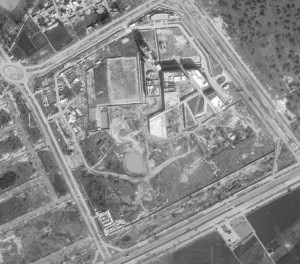

In [3]:
# Use the cvtColor() function to convert the image into grayscale from BGR
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)
#cv2.waitKey(0)

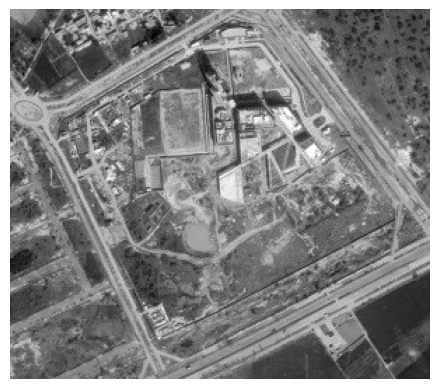

In [4]:
# Plot the grayscale image

fig = plt.gcf()
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
type(gray_image)

numpy.ndarray

In [6]:
gray_image

array([[162, 169, 167, ..., 109, 112, 110],
       [168, 169, 164, ..., 106, 107, 104],
       [160, 176, 171, ..., 109, 113, 113],
       ...,
       [191, 196, 159, ...,  74,  73,  70],
       [136, 147, 130, ...,  74,  72,  72],
       [136, 140, 133, ...,  71,  67,  67]], dtype=uint8)

### Convert the image to double

In [7]:
# To perform the mathematical operations accurately

image_double = gray_image.astype(np.float64)
image_double

array([[162., 169., 167., ..., 109., 112., 110.],
       [168., 169., 164., ..., 106., 107., 104.],
       [160., 176., 171., ..., 109., 113., 113.],
       ...,
       [191., 196., 159., ...,  74.,  73.,  70.],
       [136., 147., 130., ...,  74.,  72.,  72.],
       [136., 140., 133., ...,  71.,  67.,  67.]])

In [8]:
image_double.shape

(264, 300)

### Compute the mean of each column and subtract it from the image

In [9]:
mean_column = np.mean(image_double, axis = 0)
mean_column.shape

(300,)

In [10]:
image_mean_subtracted = image_double - mean_column
image_mean_subtracted.shape

(264, 300)

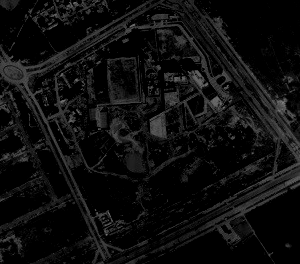

In [11]:
# Visualize the mean subtracted image

cv2_imshow(image_mean_subtracted)

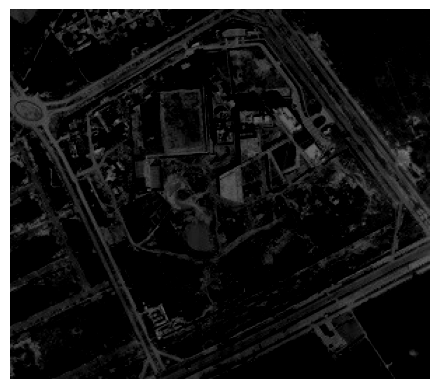

In [12]:
# Plot the mean subtracted image

fig = plt.gcf()
plt.imshow(image_mean_subtracted, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()

### Compute the covariance matrix using numpy

In [13]:
covariance_matrix = np.cov(image_mean_subtracted, rowvar = False)
covariance_matrix

array([[1518.87589296, 1343.12579214, 1121.83208031, ..., -167.01493548,
        -126.55036583, -139.92042574],
       [1343.12579214, 1545.76489227, 1265.9413815 , ..., -140.70183777,
         -89.85392902,  -73.36280101],
       [1121.83208031, 1265.9413815 , 1425.59659811, ..., -144.06704401,
         -86.40752103,  -38.05082671],
       ...,
       [-167.01493548, -140.70183777, -144.06704401, ..., 1254.67990264,
        1140.29068729, 1075.81819622],
       [-126.55036583,  -89.85392902,  -86.40752103, ..., 1140.29068729,
        1184.58519127, 1148.42033932],
       [-139.92042574,  -73.36280101,  -38.05082671, ..., 1075.81819622,
        1148.42033932, 1233.26545397]])

In [14]:
covariance_matrix.shape

# Observation - The covariance matrix is symmetrical.

(300, 300)

### Get eigenvalues and eigenvectors using numpy

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [16]:
eigenvalues[10]

(6679.373299285677+0j)

In [17]:
len(eigenvalues)

300

In [18]:
eigenvectors[:, 10].shape

(300,)

In [19]:
eigenvectors.shape

(300, 300)

### Sort eigenvectors by eigenvalues

In [20]:
index_of_sorted = np.argsort(eigenvalues)[::-1]
index_of_sorted

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  10,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  73,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  94,  93,  92,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 109, 110, 112, 111, 108, 113, 114, 115, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 116, 126, 127, 128, 129,
       130, 131, 133, 132, 134, 135, 136, 137, 138, 140, 139, 141, 142,
       143, 144, 145, 146, 147, 151, 153, 154, 152, 150, 149, 148, 155,
       156, 157, 158, 159, 160, 161, 162, 166, 170, 171, 175, 177, 178,
       176, 174, 173, 172, 168, 169, 167, 165, 164, 163, 179, 18

In [21]:
sorted_eigenvalues = eigenvalues[index_of_sorted]
sorted_eigenvalues.shape

(300,)

In [22]:
principal_components = eigenvectors[:, index_of_sorted]
principal_components.shape

(300, 300)

In [23]:
principal_components

array([[ 1.64775531e-02+0.j,  1.13838574e-02+0.j,  1.01639798e-01+0.j,
        ..., -2.12193126e-02+0.j,  5.97496350e-02+0.j,
        -8.10008999e-02+0.j],
       [ 2.09573162e-02+0.j,  1.09951118e-02+0.j,  1.19540353e-01+0.j,
        ..., -9.12833544e-03+0.j, -9.20623133e-02+0.j,
         8.52521211e-02+0.j],
       [ 3.12862767e-02+0.j,  2.93602609e-02+0.j,  1.19115524e-01+0.j,
        ..., -3.19015811e-02+0.j,  9.57754300e-02+0.j,
        -1.00467392e-01+0.j],
       ...,
       [ 7.04306480e-02+0.j, -6.39672485e-02+0.j, -5.64373005e-02+0.j,
        ..., -1.03391152e-02+0.j, -4.39811209e-02+0.j,
        -8.14174939e-02+0.j],
       [ 7.27870647e-02+0.j, -5.57765265e-02+0.j, -5.23987058e-02+0.j,
        ..., -5.50023378e-02+0.j,  1.87391332e-01+0.j,
        -1.85193694e-04+0.j],
       [ 7.43567861e-02+0.j, -5.58917639e-02+0.j, -4.34414149e-02+0.j,
        ..., -2.68257214e-02+0.j, -1.23094553e-01+0.j,
         8.86314626e-02+0.j]])

### Define the number of principal components to keep

In [24]:
num_components = [10, 20, 30, 40, 50, 60, 90]

### For each num_components, compress the image and then reconstruct it. Store all reconstructed images in **output_images** variable.

In [25]:
output_images = [ ]

In [26]:
def real_part(complex_num):
    '''
    Function to select only the real part from a complex number.
    '''
    return complex_num.real

In [27]:
for N in num_components:
  # Take N number of components and extract eigenvectors.
  eigen_matrix = principal_components[:, : N]               # Shape = (300, N)

  # Project the data onto the selected components
  compressed_data = np.dot(image_mean_subtracted, eigen_matrix)    # (264, 300) * (300, 10) -> (264, N)

  # Reconstruct the image
  reconstructed_image  = np.dot(compressed_data, eigen_matrix.T) + mean_column

  v_func = np.vectorize(real_part)
  reconstructed_image_real  = v_func(reconstructed_image)
  output_images.append(reconstructed_image_real)

In [28]:
len(output_images)

7

### Display the results

In [29]:
def compute_explained_variance(n_components):
  '''
  Function to compute the cumulative explained variance for all principal components till the (n_components)th one.
  '''
  eigen_sum = np.sum(sorted_eigenvalues)
  var_sum = sum(sorted_eigenvalues[:n_components])

  return real_part(var_sum * 1.0 / eigen_sum)

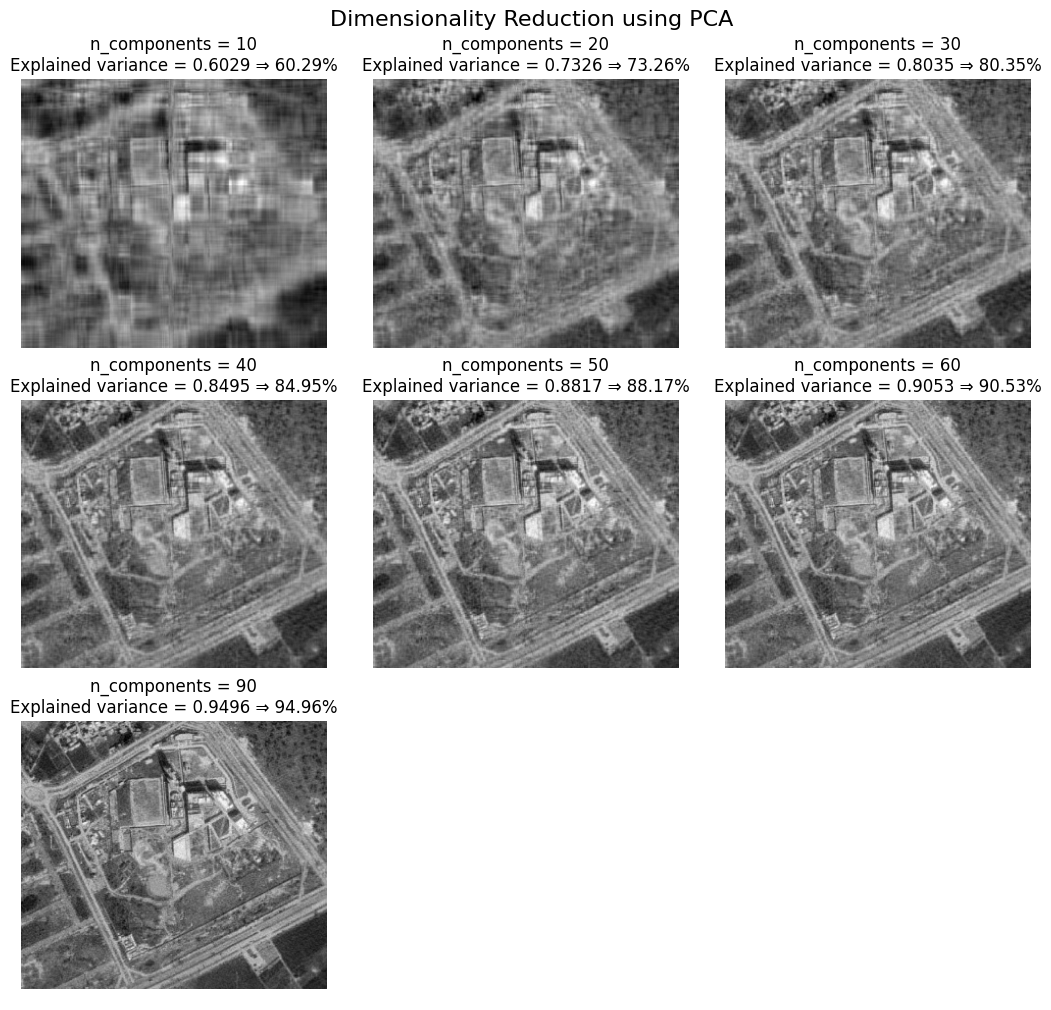

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(10.5, 10.5))
k = 0
n_rows = len(num_components) // 3 + 1

for r in range(n_rows):
  for c in range(3):
    if r == (n_rows - 1) and c != 0:
      axes[r, c].axis('off')
      break
    else:
      n_components = num_components[k]
      explained_variance = compute_explained_variance(n_components)

      axes[r, c].imshow(output_images[k], cmap='gray')
      title_text = f'n_components = {n_components}\nExplained variance = {explained_variance:.4f} '
      title_text += f'\u21D2 {100 * explained_variance:.2f}%'
      axes[r, c].set_title(title_text)
      axes[r, c].axis('off')
      k += 1

plt.suptitle('Dimensionality Reduction using PCA', fontsize=16)
plt.tight_layout()
plt.axis('off')
plt.show()

### Now compute minimum num_components needed to explain 95% variance in data

In [31]:
tot_components = len(sorted_eigenvalues)
tot_components

300

**Finding minimum num_components using computed eigenvalues.**

In [32]:
for num_components in range(tot_components):
  explained_variance = compute_explained_variance(num_components) * 100
  if explained_variance >= 95:
    print('Minimum number of components needed to explain 95% variance in data is:', num_components)
    break

Minimum number of components needed to explain 95% variance in data is: 91


**Finding minimum num_components using PCA function from sklearn**

In [33]:
for num_components in range(tot_components):
  pca = PCA(n_components = num_components)
  pca.fit(image_double)

  explained_variance = sum(pca.explained_variance_ratio_) * 100
  if explained_variance >= 95:
    print('Minimum number of components needed to explain 95% variance in data using PCA is:', num_components)
    break

Minimum number of components needed to explain 95% variance in data using PCA is: 91
